# Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

In [2]:
sample = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Samples\\cod_sample_cleaned.csv').drop('Unnamed: 0', axis=1)

### Exploratory Analysis

In [3]:
time_corr = sample.corr()[['Years']]

top_time_corr =time_corr[abs(time_corr['Years'])>0.90]
top_time_corr = top_time_corr.sort_values('Years', ascending=False)

In [4]:
counts = []

for col in sample.columns[4:]:
    
    col_corr = sample.corr()[[col]]
    col_cnt = col_corr[np.abs(col_corr[col])>0.95][col].count()
    
    counts.append([col, col_cnt])
    
corr_rank = pd.DataFrame(counts, columns=['Feature', 'N° of corr.'])

corr_rank = corr_rank.sort_values('N° of corr.', ascending=False)
corr_rank = corr_rank.reset_index(drop=True)

In [5]:
def get_corr(trg, sample, min_corr=0.9):
    
    trg_corr = sample.corr()[[trg]]

    trg_corr = trg_corr.sort_values(trg, ascending=False)
    trg_corr = trg_corr[np.abs(trg_corr[trg]) > min_corr]
    
    trg_corr.rename(columns={trg:trg+' corr'}, inplace=True)
    
    return trg_corr


#### Target Definition

In [6]:
trg = 'Chronic liver disease'

trg_corr = get_corr(trg, sample, min_corr=0.92)

In [7]:
trg_corr

,Chronic liver disease corr
Chronic liver disease,1.000000
Cerebrovascular diseases,0.985631
Diseases of the circulatory system (I00-I99),0.981677
External causes of morbidity and mortality (V01-Y89),0.978705
Accidents,0.964024
Diseases of the skin and subcutaneous tissue (L00-L99),0.960513
Tuberculosis,0.957512
Asthma and status asthmaticus,0.948087
Ischaemic heart diseases,0.933472
Transport accidents (V01-V99),0.927816


### Spliting Train and Test Sets

In [32]:
in_sample = np.random.rand(len(sample))<0.75


train_set = sample[in_sample]
test_set = sample[~in_sample]

y_train = train_set[trg]
x_train = train_set[trg_corr.index[1:]]                  # For multiple polynomial regression
#x_train = train_set[['Cerebrovascular diseases']]         # For simple polynomial regression

y_test = test_set[trg]
x_test = test_set[trg_corr.index[1:]]
#x_test = test_set[['Cerebrovascular diseases']]

In [33]:
y_train.shape, y_test.shape, x_train.shape, x_test.shape

((6,), (2,), (6, 10), (2, 10))

In [34]:
trg_corr.index[1:].to_list() == x_train.columns.tolist()

True

### Polynomial Transformation of features

In [18]:
from sklearn import preprocessing
dgr = 10
poly = preprocessing.PolynomialFeatures(degree=dgr)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

### Polynomial Regression Modeling

In [269]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

regr.fit(x_train_poly, y_train)

yo = regr.intercept_
ai = regr.coef_

In [270]:
yo, print(ai.tolist()[:20])

[-1.660318327681641e-46, -4.6887600614626496e-48, -1.7350923840055205e-48, 5.573978709054942e-49, 3.95170668748978e-49, 1.5176686929641854e-89, 1.1328799449515085e-89, 3.6611836748012413e-90, 4.21791090416113e-89, 5.732670011832079e-90, -2.139428524893232e-90, 1.4379356873175364e-84, 3.0601460185780554e-84, 2.1718472694243834e-84, 4.8378589015649384e-85, 2.4285035978812775e-85, 1.8093743828708633e-85, 6.809624577301692e-86, 1.6828516228140554e-84, 2.4165015873929283e-85]


(5682.543755992777, None)

### Evaluation

In [271]:
from sklearn import metrics

y_hat = regr.predict(x_test_poly)

abse = np.mean(np.absolute(y_hat-y_test))
msqe = np.mean((y_hat-y_test)**2)

R2 = regr.score(x_test_poly, y_test)
r2 = metrics.r2_score(y_hat, y_test)


In [272]:
abse, msqe

(71.3701288837533, 5110.50349082697)

In [273]:
R2, r2

(0.9426445068353833, 0.9441881428314219)

### Visualizing Model

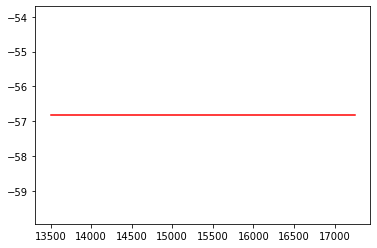

In [274]:
#plt.scatter(x_train, y_train, color='blue')

xx = np.arange(13500, 17500, 250)
yy = -(yo + sum([ai[i]*xx**i for i in range(4)]))/100        # Why *-1/100?

plt.plot(xx, yy, '-r')

In [11]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics

In [35]:
r2_scores = []
cnt=0

In [39]:
for dgr in range(17,19):     ### Try maximum to 18.
 
    poly = preprocessing.PolynomialFeatures(degree=dgr)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
#-------------------------------------------
    regr = linear_model.LinearRegression()
    regr.fit(x_train_poly, y_train)
#-------------------------------
    yo = regr.intercept_
    ai = regr.coef_
#---------------------------------------
    y_hat = regr.predict(x_test_poly)
#-----------------------------------------------
    abse = np.mean(np.absolute(y_hat-y_test))
    msqe = np.mean((y_hat-y_test)**2)
#------------------------------------------
    R2 = regr.score(x_test_poly, y_test)
    r2 = metrics.r2_score(y_hat, y_test)
#-----------------------------------------
    r2_scores.append([dgr, R2, r2])
    
    cnt+=1
    print('Degree ',dgr, ' Added.')

Degree  17  Added.
Degree  18  Added.


In [40]:
print(len(r2_scores))

18


(0.0, 1.2)

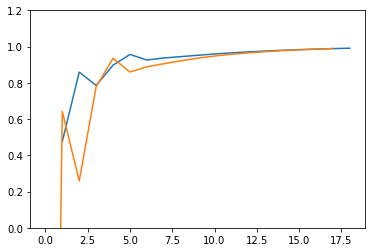

In [44]:
plt.plot(list(range(1,19)), [i[1] for i in r2_scores], [i[2] for i in r2_scores])
plt.ylim(0,1.2)

In [29]:
r2_scores

[[1, -56.771946652576254, 0.2001656955322504],
 [2, -87.78628573711687, 0.15567241328759696],
 [3, -96.35094466325212, 0.16726202618507802],
 [4, -88.13447949405527, 0.16685221297632014],
 [5, -76.40315972861067, 0.19254902306686061],
 [6, -73.93676307542471, 0.196369826104571],
 [7, -66.50514488628221, 0.2052269690075189],
 [8, -61.442246846568494, 0.21132779995803885],
 [9, -58.04840325969818, 0.21571457684796458],
 [10, -54.717969246160926, 0.2199522394841149],
 [11, -51.909812972292656, 0.22368515367395791],
 [12, -49.487377930611665, 0.2268422258570687],
 [13, -47.47795544874841, 0.2295439341279487],
 [14, -45.80587387203595, 0.23181035493137347],
 [15, -44.44637673343464, 0.23370213791723327],
 [16, -43.36210576585456, 0.23528225867335661],
 [17, -42.52645792533139, 0.23658930152307078],
 [18, -41.91331236706075, 0.23763474133309292]]